### ISSUE: Add Start and End tokens in the sentence

### Importing Dependencies

In [1]:
!nvidia-smi

Tue May 17 17:52:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import collections
import random
import numpy as np
import os
import time
import json
from PIL import Image

In [3]:
## Function to unzip the data
import zipfile
def unzip_data(filename):
  ## Takes in the filename and unzips it 
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

### Training InceptionV3 to extract features from x rays 

1) Preparing Data in the tensorflow image from directory dataset 
Train Folder -> Class Foldes 

In [4]:
train_dir_features_zipped = "/content/drive/MyDrive/NIH Chest X rays/archive.zip"
unzip_data(train_dir_features_zipped)

In [5]:
## Loading the data into dataframe
import pandas as pd
cls_dataset = pd.read_csv("/content/Data_Entry_2017.csv")
cls_dataset.tail()

Image Index  Finding Labels  Follow-up #  Patient ID  \
112115  00030801_001.png  Mass|Pneumonia            1       30801   
112116  00030802_000.png      No Finding            0       30802   
112117  00030803_000.png      No Finding            0       30803   
112118  00030804_000.png      No Finding            0       30804   
112119  00030805_000.png      No Finding            0       30805   

        Patient Age Patient Gender View Position  OriginalImage[Width  \
112115           39              M            PA                 2048   
112116           29              M            PA                 2048   
112117           42              F            PA                 2048   
112118           30              F            PA                 2048   
112119           27              M            PA                 2048   

        Height]  OriginalImagePixelSpacing[x     y]  Unnamed: 11  
112115     2500                        0.168  0.168          NaN  
112116     2500                        0.168  0.168          NaN  
112117     2500                        0.168  0.168          NaN  
112118     2500                        0.168  0.168          NaN  
112119     2500                        0.171  0.171          NaN

In [6]:
## Exploring the dataseet 
len(cls_dataset["Image Index"])

112120

In [7]:
os.mkdir("x_ray_train")

In [8]:
cls_dataset["Finding Labels"].value_counts()[:12]

No Finding                  60361
Infiltration                 9547
Atelectasis                  4215
Effusion                     3955
Nodule                       2705
Pneumothorax                 2194
Mass                         2139
Effusion|Infiltration        1603
Atelectasis|Infiltration     1350
Consolidation                1310
Atelectasis|Effusion         1165
Pleural_Thickening           1126
Name: Finding Labels, dtype: int64

In [9]:
## Creating Folders with class names 
os.mkdir("x_ray_train/No Finding")

In [10]:
## Creating Folders with class names 
os.mkdir("x_ray_train/Infiltration")
os.mkdir("x_ray_train/Atelectasis")
os.mkdir("x_ray_train/Effusion")
os.mkdir("x_ray_train/Nodule")
os.mkdir("x_ray_train/Pneumothorax")
os.mkdir("x_ray_train/Mass")
os.mkdir("x_ray_train/Effusion|Infiltration")
os.mkdir("x_ray_train/Atelectasis|Infiltration")
os.mkdir("x_ray_train/Consolidation")
os.mkdir("x_ray_train/Atelectasis|Effusion")
os.mkdir("x_ray_train/Pleural_Thickening")

In [11]:
os.mkdir("temp_img")

In [12]:
import shutil

In [13]:
## Moving contents to the respected class folders
shutil.move("/content/images_001/images/00000001_000.png", "/content/temp_img")

'/content/temp_img/00000001_000.png'

In [14]:
TEMP_PATH = "/content/temp_img"
for img in os.listdir("/content/images_001/images"):
  move_path = "/content/images_001/images/"
  move_img_path = move_path + img
  shutil.move(move_img_path, TEMP_PATH)

In [15]:
for img in os.listdir("/content/images_002/images"):
  move_path = "/content/images_002/images/"
  move_img_path = move_path + img
  shutil.move(move_img_path, TEMP_PATH)

In [16]:
for img in os.listdir("/content/images_003/images"):
  move_path = "/content/images_003/images/"
  move_img_path = move_path + img
  shutil.move(move_img_path, TEMP_PATH)

In [17]:
for img in os.listdir("/content/images_004/images"):
  move_path = "/content/images_004/images/"
  move_img_path = move_path + img
  shutil.move(move_img_path, TEMP_PATH)

In [18]:
for img in os.listdir("/content/images_005/images"):
  move_path = "/content/images_005/images/"
  move_img_path = move_path + img
  shutil.move(move_img_path, TEMP_PATH)

In [19]:
for img in os.listdir("/content/images_006/images"):
  move_path = "/content/images_006/images/"
  move_img_path = move_path + img
  shutil.move(move_img_path, TEMP_PATH)

In [20]:
for img in os.listdir("/content/images_007/images"):
  move_path = "/content/images_007/images/"
  move_img_path = move_path + img
  shutil.move(move_img_path, TEMP_PATH)

In [21]:
for img in os.listdir("/content/images_008/images"):
  move_path = "/content/images_008/images/"
  move_img_path = move_path + img
  shutil.move(move_img_path, TEMP_PATH)

In [22]:
for img in os.listdir("/content/images_009/images"):
  move_path = "/content/images_009/images/"
  move_img_path = move_path + img
  shutil.move(move_img_path, TEMP_PATH)

In [23]:
for img in os.listdir("/content/images_010/images"):
  move_path = "/content/images_010/images/"
  move_img_path = move_path + img
  shutil.move(move_img_path, TEMP_PATH)

In [24]:
for img in os.listdir("/content/images_011/images"):
  move_path = "/content/images_011/images/"
  move_img_path = move_path + img
  shutil.move(move_img_path, TEMP_PATH)

In [25]:
for img in os.listdir("/content/images_012/images"):
  move_path = "/content/images_012/images/"
  move_img_path = move_path + img
  shutil.move(move_img_path, TEMP_PATH)

In [26]:
len(os.listdir("/content/temp_img"))

112120

In [27]:
cls_dataset.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                        0.143  0.143          NaN  
1                        0.143  0.143          NaN  
2                        0.168  0.168          NaN  
3                        0.171  0.171          NaN  
4                        0.143  0.143          NaN

In [28]:
cls_images = list(cls_dataset["Image Index"])
cls_findings = list(cls_dataset["Finding Labels"])
len(cls_images), len(cls_findings)

(112120, 112120)

In [29]:
class_names = []
for dir in os.listdir("/content/x_ray_train"):
  dir_name = str(dir)
  class_names.append(dir_name)

In [30]:
class_names

['Pleural_Thickening',
 'Mass',
 'Nodule',
 'Consolidation',
 'Pneumothorax',
 'Atelectasis|Infiltration',
 'Effusion',
 'Infiltration',
 'Atelectasis|Effusion',
 'No Finding',
 'Effusion|Infiltration',
 'Atelectasis']

In [31]:
cls_dataset.head(10)

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   
5  00000003_001.png                  Hernia            1           3   
6  00000003_002.png                  Hernia            2           3   
7  00000003_003.png     Hernia|Infiltration            3           3   
8  00000003_004.png                  Hernia            4           3   
9  00000003_005.png                  Hernia            5           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   
5           74              F            PA                 2500     2048   
6           75              F            PA                 2048     2500   
7           76              F            PA                 2698     2991   
8           77              F            PA                 2500     2048   
9           78              F            PA                 2686     2991   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                        0.143  0.143          NaN  
1                        0.143  0.143          NaN  
2                        0.168  0.168          NaN  
3                        0.171  0.171          NaN  
4                        0.143  0.143          NaN  
5                        0.168  0.168          NaN  
6                        0.168  0.168          NaN  
7                        0.143  0.143          NaN  
8                        0.168  0.168          NaN  
9                        0.143  0.143          NaN

In [32]:
## Sanity check
cls_dataset[cls_dataset["Image Index"] == "00000005_007.png"]

Image Index         Finding Labels  Follow-up #  Patient ID  \
20  00000005_007.png  Effusion|Infiltration            7           5   

    Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
20           70              F            PA                 2566     2681   

    OriginalImagePixelSpacing[x     y]  Unnamed: 11  
20                        0.143  0.143          NaN

In [33]:
## Creating the training dataset folder by rightly arranging the files in directories
TRAIN_PATH = "/content/x_ray_train/"
print(TEMP_PATH)
for index, label in enumerate(cls_findings):
  if label in class_names:
    move_dir = TRAIN_PATH + cls_findings[index] 
    img_to_move = TEMP_PATH + "/" + cls_images[index]
    shutil.move(img_to_move, move_dir)

/content/temp_img


In [34]:
## Sanity check 
for dir in os.listdir(TRAIN_PATH):
  check_dir = TRAIN_PATH + dir
  print(f"{dir} has {len(os.listdir(check_dir))} images")

Pleural_Thickening has 1126 images
Mass has 2139 images
Nodule has 2705 images
Consolidation has 1310 images
Pneumothorax has 2194 images
Atelectasis|Infiltration has 1350 images
Effusion has 3955 images
Infiltration has 9547 images
Atelectasis|Effusion has 1165 images
No Finding has 60361 images
Effusion|Infiltration has 1603 images
Atelectasis has 4215 images


2) Preparing the test folder for model validation

15 Percent test split

In [35]:
## Making the test directory
os.mkdir("x_ray_test")

In [36]:
## Making the class name directories inside the test foldeer
os.mkdir("x_ray_test/No Finding")
os.mkdir("x_ray_test/Infiltration")
os.mkdir("x_ray_test/Atelectasis")
os.mkdir("x_ray_test/Effusion")
os.mkdir("x_ray_test/Nodule")
os.mkdir("x_ray_test/Pneumothorax")
os.mkdir("x_ray_test/Mass")
os.mkdir("x_ray_test/Effusion|Infiltration")
os.mkdir("x_ray_test/Atelectasis|Infiltration")
os.mkdir("x_ray_test/Consolidation")
os.mkdir("x_ray_test/Atelectasis|Effusion")
os.mkdir("x_ray_test/Pleural_Thickening")

In [37]:
test_split = {}
for dir in os.listdir(TRAIN_PATH):
  path = TRAIN_PATH + dir
  no_test_samples = int(0.15 * len(os.listdir(path)))
  test_split[dir] = no_test_samples

In [38]:
test_split

{'Atelectasis': 632,
 'Atelectasis|Effusion': 174,
 'Atelectasis|Infiltration': 202,
 'Consolidation': 196,
 'Effusion': 593,
 'Effusion|Infiltration': 240,
 'Infiltration': 1432,
 'Mass': 320,
 'No Finding': 9054,
 'Nodule': 405,
 'Pleural_Thickening': 168,
 'Pneumothorax': 329}

In [39]:
## Moving the files to the test directory
TEST_PATH ="/content/x_ray_test/"
for dir in os.listdir(TRAIN_PATH):
  path = TRAIN_PATH + dir
  ts = test_split[dir]
  counter = 0
  move_test_path = TEST_PATH + dir
  for img in os.listdir(path):
    new_path = path + "/" + img
    if counter <= ts:
      shutil.move(new_path, move_test_path)
      counter += 1

In [40]:
## Sanity check
for dir in os.listdir(TEST_PATH):
  new_path = TEST_PATH + dir
  print(len(os.listdir(new_path)))

169
321
406
197
330
203
594
1433
175
9055
241
633


In [41]:
## Creating the training dataset
IMG_SIZE = (299, 299)
cls_train_dir = "/content/x_ray_train"
print("Training Images")
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = cls_train_dir,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = "categorical",
                                                                 color_mode = "rgb",
                                                                 batch_size = 32)

Training Images
Found 77913 files belonging to 12 classes.


In [42]:
print("Testing Images")
cls_test_dir = "/content/x_ray_test"
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = cls_test_dir,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = "categorical",
                                                                 color_mode = "rgb",
                                                                 batch_size = 32)

Testing Images
Found 13757 files belonging to 12 classes.


In [43]:
## Sanity check 
train_data, test_data

(<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 12), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 12), dtype=tf.float32, name=None))>)

3) Preparing the Model

### Building the classification Model

In [44]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 12), dtype=tf.float32, name=None))>

In [45]:
base_model = tf.keras.applications.inception_v3.InceptionV3(include_top=False,
                                                weights='imagenet',
                                               input_shape = (299, 299, 3))  

87924736/87910968 [==============================] - 0s 0us/step


In [46]:
base_model.trainable = True 

In [47]:
## Making the model 
model_0 = tf.keras.Sequential(
    [
     tf.keras.layers.Input(shape = (299, 299, 3), name = "Input_layer"),
     base_model,
     tf.keras.layers.GlobalMaxPool2D(),
     tf.keras.layers.Dense(12, activation = "softmax")
    ]
)

In [48]:
model_0.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [49]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 12)                24588     
                                                                 
Total params: 21,827,372
Trainable params: 21,792,940
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
## Setting up callbacks
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.25, # multiply the learning rate by 0.2 (reduce by 4x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

In [ ]:
train_data, test_data

In [ ]:
history_0 = model_0.fit(train_data,
                        epochs = 3,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = int(0.25*len(test_data)),
                        callbacks = [early_stopping, reduce_lr])

In [ ]:
model_0.save("/content/drive/MyDrive/model_0_feature_extract")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/model_0_feature_extract/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/model_0_feature_extract/assets


### Loading in the model

In [43]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/model_0_feature_extract")

In [44]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.
  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [45]:
train_data, test_data

(<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 12), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 12), dtype=tf.float32, name=None))>)

In [48]:
preds = loaded_model.predict(test_data)

In [64]:
y = preds.argmax(axis = 1)

In [65]:
y

array([8, 8, 8, ..., 8, 8, 8])

In [66]:
y.shape

(13757,)

In [71]:
y_true = np.array(y_true)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [79]:
from tqdm import tqdm
true_labels = []
for x in tqdm(y_true):
  a = np.argmax(x, axis = 0)
  true_labels.append(a)

100%|██████████| 430/430 [00:00<00:00, 21572.54it/s]


In [80]:
true_labels

[array([ 7,  0, 30, 20, 21, 24,  0, 13,  1,  0,  0, 25]),
 array([ 8,  0,  0,  0,  6,  3, 10,  0,  0,  0,  0, 18]),
 array([24,  0,  0,  0, 29,  0,  4,  0,  0,  0, 12,  0]),
 array([ 1,  0,  0,  0, 22,  0, 15,  6,  0,  9,  0, 16]),
 array([ 1, 31,  0,  0, 15,  0,  8,  0,  0,  0, 14, 19]),
 array([ 2,  0,  0, 13, 11,  0, 10,  0,  0, 14,  0,  0]),
 array([18,  7, 17,  0,  0,  0,  5,  0,  0,  0,  0,  0]),
 array([19,  0,  4,  0, 13,  0,  2, 30,  0, 14, 24,  0]),
 array([15,  0, 26,  0, 10, 23,  7, 25,  0, 21, 11,  0]),
 array([ 2, 12,  0, 25,  9, 13,  1,  0,  3,  0,  7,  0]),
 array([ 0,  0,  0,  0,  3, 12, 13, 22,  0,  0,  4, 23]),
 array([ 0,  0,  7,  0,  0,  0,  8, 14,  0, 25, 23,  0]),
 array([ 4, 18,  0,  0,  0,  0,  1, 30,  0,  0,  0,  0]),
 array([16,  0,  0, 12,  0,  3,  1,  6,  2,  0,  0,  0]),
 array([13, 19,  0,  0,  4,  0,  2,  0,  0,  0,  0,  0]),
 array([ 4,  0,  0,  9, 30,  0, 20, 25,  0, 11,  0,  2]),
 array([14, 21,  0,  0, 30,  0,  2,  1,  0,  3,  0,  9]),
 array([28, 30

In [56]:
class_names[8]

'Atelectasis|Effusion'

In [58]:
y_true = []
for x, y in test_data:
  y_true.append(y)

In [62]:
y_true = tf.constant(y_true)

ValueError: ignored

In [63]:
y.shape

TensorShape([29, 12])

In [ ]:
loaded_model.evaluate(test_data)

In [53]:
base_model = loaded_model.layers[0]

In [54]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

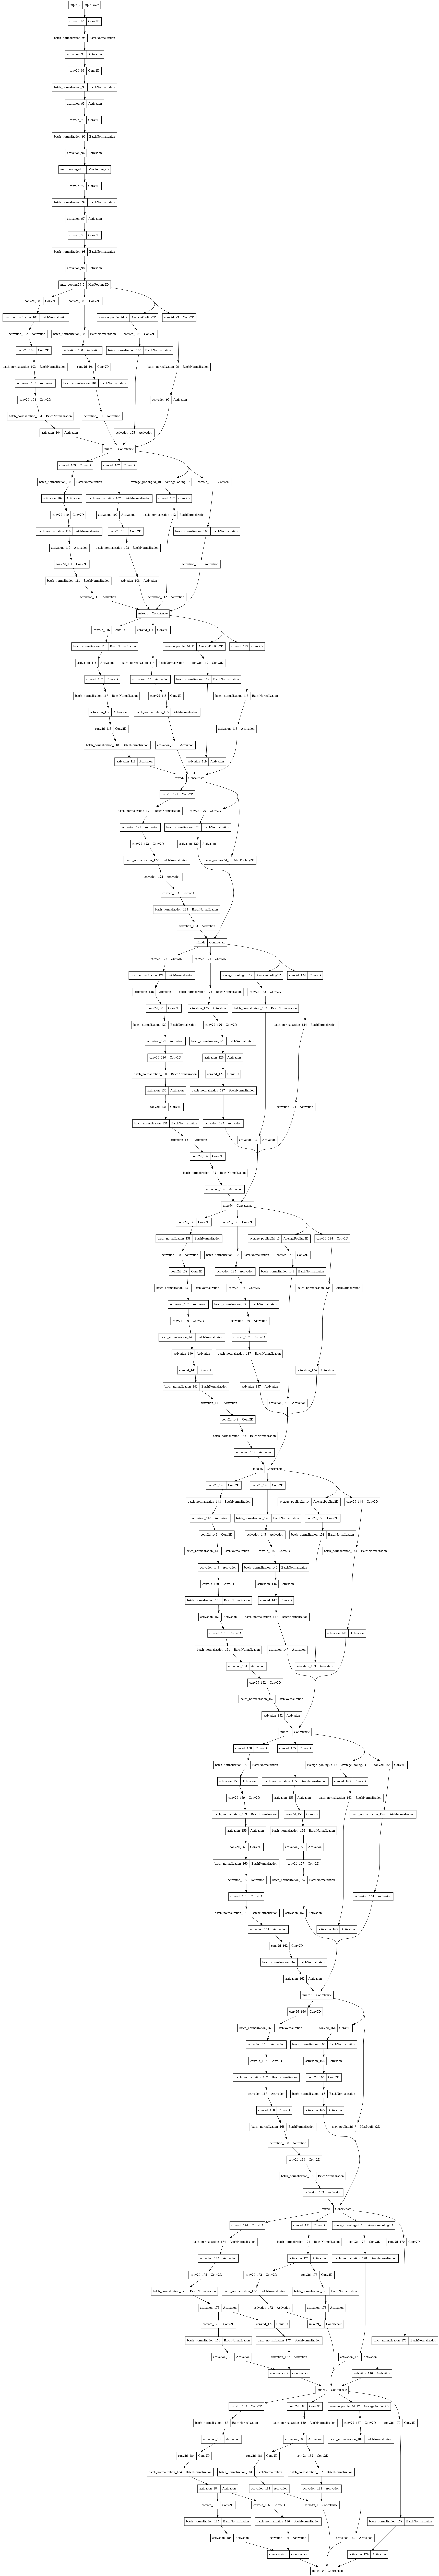

In [55]:
from tensorflow.keras.utils import plot_model
plot_model(base_model)

### Medical Image Captioning

In [56]:
train_file = "/content/drive/MyDrive/Chest_X_Rays_Captioning/archive.zip"
## Unzipping the data
unzip_data(train_file)

In [57]:
def walk_through_dir(dir_path):
  ## Walks through the directories in the folder 
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [88]:
len(os.listdir("/content/images/images_normalized"))

7470

In [89]:
### Visualizing the dataset 
import pandas as pd
df = pd.read_csv("/content/indiana_reports.csv")
df.head()

uid                                               MeSH  \
0    1                                             normal   
1    2  Cardiomegaly/borderline;Pulmonary Artery/enlarged   
2    3                                             normal   
3    4  Pulmonary Disease, Chronic Obstructive;Bullous...   
4    5  Osteophyte/thoracic vertebrae/multiple/small;T...   

                                            Problems  \
0                                             normal   
1                      Cardiomegaly;Pulmonary Artery   
2                                             normal   
3  Pulmonary Disease, Chronic Obstructive;Bullous...   
4                         Osteophyte;Thickening;Lung   

                                               image  \
0                          Xray Chest PA and Lateral   
1                Chest, 2 views, frontal and lateral   
2                          Xray Chest PA and Lateral   
3  PA and lateral views of the chest XXXX, XXXX a...   
4                          Xray Chest PA and Lateral   

                                          indication      comparison  \
0                                   Positive TB test           None.   
1                           Preop bariatric surgery.           None.   
2  rib pain after a XXXX, XXXX XXXX steps this XX...             NaN   
3                      XXXX-year-old XXXX with XXXX.  None available   
4                        Chest and nasal congestion.             NaN   

                                            findings  \
0  The cardiac silhouette and mediastinum size ar...   
1  Borderline cardiomegaly. Midline sternotomy XX...   
2                                                NaN   
3  There are diffuse bilateral interstitial and a...   
4  The cardiomediastinal silhouette and pulmonary...   

                                          impression  
0                               Normal chest x-XXXX.  
1                       No acute pulmonary findings.  
2  No displaced rib fractures, pneumothorax, or p...  
3  1. Bullous emphysema and interstitial fibrosis...  
4              No acute cardiopulmonary abnormality.

In [90]:
dff = pd.read_csv("/content/indiana_projections.csv")
dff.head()

uid                filename projection
0    1  1_IM-0001-4001.dcm.png    Frontal
1    1  1_IM-0001-3001.dcm.png    Lateral
2    2  2_IM-0652-1001.dcm.png    Frontal
3    2  2_IM-0652-2001.dcm.png    Lateral
4    3  3_IM-1384-1001.dcm.png    Frontal

In [91]:
dataframe = pd.merge(df, dff, on =['uid'])

In [92]:
dataframe[:10]

uid                                               MeSH  \
0    1                                             normal   
1    1                                             normal   
2    2  Cardiomegaly/borderline;Pulmonary Artery/enlarged   
3    2  Cardiomegaly/borderline;Pulmonary Artery/enlarged   
4    3                                             normal   
5    3                                             normal   
6    4  Pulmonary Disease, Chronic Obstructive;Bullous...   
7    4  Pulmonary Disease, Chronic Obstructive;Bullous...   
8    5  Osteophyte/thoracic vertebrae/multiple/small;T...   
9    5  Osteophyte/thoracic vertebrae/multiple/small;T...   

                                            Problems  \
0                                             normal   
1                                             normal   
2                      Cardiomegaly;Pulmonary Artery   
3                      Cardiomegaly;Pulmonary Artery   
4                                             normal   
5                                             normal   
6  Pulmonary Disease, Chronic Obstructive;Bullous...   
7  Pulmonary Disease, Chronic Obstructive;Bullous...   
8                         Osteophyte;Thickening;Lung   
9                         Osteophyte;Thickening;Lung   

                                               image  \
0                          Xray Chest PA and Lateral   
1                          Xray Chest PA and Lateral   
2                Chest, 2 views, frontal and lateral   
3                Chest, 2 views, frontal and lateral   
4                          Xray Chest PA and Lateral   
5                          Xray Chest PA and Lateral   
6  PA and lateral views of the chest XXXX, XXXX a...   
7  PA and lateral views of the chest XXXX, XXXX a...   
8                          Xray Chest PA and Lateral   
9                          Xray Chest PA and Lateral   

                                          indication      comparison  \
0                                   Positive TB test           None.   
1                                   Positive TB test           None.   
2                           Preop bariatric surgery.           None.   
3                           Preop bariatric surgery.           None.   
4  rib pain after a XXXX, XXXX XXXX steps this XX...             NaN   
5  rib pain after a XXXX, XXXX XXXX steps this XX...             NaN   
6                      XXXX-year-old XXXX with XXXX.  None available   
7                      XXXX-year-old XXXX with XXXX.  None available   
8                        Chest and nasal congestion.             NaN   
9                        Chest and nasal congestion.             NaN   

                                            findings  \
0  The cardiac silhouette and mediastinum size ar...   
1  The cardiac silhouette and mediastinum size ar...   
2  Borderline cardiomegaly. Midline sternotomy XX...   
3  Borderline cardiomegaly. Midline sternotomy XX...   
4                                                NaN   
5                                                NaN   
6  There are diffuse bilateral interstitial and a...   
7  There are diffuse bilateral interstitial and a...   
8  The cardiomediastinal silhouette and pulmonary...   
9  The cardiomediastinal silhouette and pulmonary...   

                                          impression  \
0                               Normal chest x-XXXX.   
1                               Normal chest x-XXXX.   
2                       No acute pulmonary findings.   
3                       No acute pulmonary findings.   
4  No displaced rib fractures, pneumothorax, or p...   
5  No displaced rib fractures, pneumothorax, or p...   
6  1. Bullous emphysema and interstitial fibrosis...   
7  1. Bullous emphysema and interstitial fibrosis...   
8              No acute cardiopulmonary abnormality.   
9              No acute cardiopulmonary abnormality.   

                    filename projection  
0     1_IM-0001-4001.dcm.png

In [93]:
len(dataframe)

7466

In [94]:
images = dataframe["filename"].tolist()

In [95]:
try_captions = dataframe["Problems"].tolist() + dataframe["indication"].tolist()

In [96]:
findings = list(dataframe["findings"])
indication = list(dataframe["indication"])
impression = list(dataframe["impression"])

In [97]:
len(findings), len(indication), len(impression)

(7466, 7466, 7466)

In [98]:
try_captions = []
b = 0
for a in range(len(findings)):
  captions = str("<start> "+"startseq " + "Indications: " + str(indication[a]) + " endseq " + "startseq " + "Findings: " + str(findings[a]) + " endseq "+"startseq " + "Impressions: " + str(impression[a]) + " endseq" + " <end>")
  try_captions.append(captions)

In [99]:
try_captions[:2]

['<start> startseq Indications: Positive TB test endseq startseq Findings: The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. endseq startseq Impressions: Normal chest x-XXXX. endseq <end>',
 '<start> startseq Indications: Positive TB test endseq startseq Findings: The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. endseq startseq Impressions: Normal chest x-XXXX. endseq <end>']

In [100]:
try_captions[:10]

['<start> startseq Indications: Positive TB test endseq startseq Findings: The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. endseq startseq Impressions: Normal chest x-XXXX. endseq <end>',
 '<start> startseq Indications: Positive TB test endseq startseq Findings: The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. endseq startseq Impressions: Normal chest x-XXXX. endseq <end>',
 '<start> startseq Indications: Preop bariatric surgery. endseq startseq Findings: Borderline cardiomegaly. Midline sternotomy XXXX. Enlarged pulmonary arteries. Clear lungs. Inferior XXXX XXXX XXXX. endseq startseq Impressions: No acute pulmonary findings. endseq <end>',
 '<start> startseq Indica

In [101]:
train_captions = try_captions

In [102]:
train_captions[:5]

['<start> startseq Indications: Positive TB test endseq startseq Findings: The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. endseq startseq Impressions: Normal chest x-XXXX. endseq <end>',
 '<start> startseq Indications: Positive TB test endseq startseq Findings: The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. endseq startseq Impressions: Normal chest x-XXXX. endseq <end>',
 '<start> startseq Indications: Preop bariatric surgery. endseq startseq Findings: Borderline cardiomegaly. Midline sternotomy XXXX. Enlarged pulmonary arteries. Clear lungs. Inferior XXXX XXXX XXXX. endseq startseq Impressions: No acute pulmonary findings. endseq <end>',
 '<start> startseq Indica

In [103]:
image_paths = []
for img in images:
  path = "/content/images/images_normalized/" + img
  image_paths.append(path)

In [104]:
image_paths[:5]

['/content/images/images_normalized/1_IM-0001-4001.dcm.png',
 '/content/images/images_normalized/1_IM-0001-3001.dcm.png',
 '/content/images/images_normalized/2_IM-0652-1001.dcm.png',
 '/content/images/images_normalized/2_IM-0652-2001.dcm.png',
 '/content/images/images_normalized/3_IM-1384-1001.dcm.png']

In [105]:
dataframe.head()

uid                                               MeSH  \
0    1                                             normal   
1    1                                             normal   
2    2  Cardiomegaly/borderline;Pulmonary Artery/enlarged   
3    2  Cardiomegaly/borderline;Pulmonary Artery/enlarged   
4    3                                             normal   

                        Problems                                image  \
0                         normal            Xray Chest PA and Lateral   
1                         normal            Xray Chest PA and Lateral   
2  Cardiomegaly;Pulmonary Artery  Chest, 2 views, frontal and lateral   
3  Cardiomegaly;Pulmonary Artery  Chest, 2 views, frontal and lateral   
4                         normal            Xray Chest PA and Lateral   

                                          indication comparison  \
0                                   Positive TB test      None.   
1                                   Positive TB test      None.   
2                           Preop bariatric surgery.      None.   
3                           Preop bariatric surgery.      None.   
4  rib pain after a XXXX, XXXX XXXX steps this XX...        NaN   

                                            findings  \
0  The cardiac silhouette and mediastinum size ar...   
1  The cardiac silhouette and mediastinum size ar...   
2  Borderline cardiomegaly. Midline sternotomy XX...   
3  Borderline cardiomegaly. Midline sternotomy XX...   
4                                                NaN   

                                          impression                filename  \
0                               Normal chest x-XXXX.  1_IM-0001-4001.dcm.png   
1                               Normal chest x-XXXX.  1_IM-0001-3001.dcm.png   
2                       No acute pulmonary findings.  2_IM-0652-1001.dcm.png   
3                       No acute pulmonary findings.  2_IM-0652-2001.dcm.png   
4  No displaced rib fractures, pneumothorax, or p...  3_IM-1384-1001.dcm.png   

  projection  
0    Frontal  
1    Lateral  
2    Frontal  
3    Lateral  
4    Frontal

In [106]:
## Sanity check on the image and caption arrays 
image_paths[:5]

['/content/images/images_normalized/1_IM-0001-4001.dcm.png',
 '/content/images/images_normalized/1_IM-0001-3001.dcm.png',
 '/content/images/images_normalized/2_IM-0652-1001.dcm.png',
 '/content/images/images_normalized/2_IM-0652-2001.dcm.png',
 '/content/images/images_normalized/3_IM-1384-1001.dcm.png']

In [107]:
train_captions[:5]

['<start> startseq Indications: Positive TB test endseq startseq Findings: The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. endseq startseq Impressions: Normal chest x-XXXX. endseq <end>',
 '<start> startseq Indications: Positive TB test endseq startseq Findings: The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. endseq startseq Impressions: Normal chest x-XXXX. endseq <end>',
 '<start> startseq Indications: Preop bariatric surgery. endseq startseq Findings: Borderline cardiomegaly. Midline sternotomy XXXX. Enlarged pulmonary arteries. Clear lungs. Inferior XXXX XXXX XXXX. endseq startseq Impressions: No acute pulmonary findings. endseq <end>',
 '<start> startseq Indica

### Sanity Check

<start> startseq Indications: Positive TB test endseq startseq Findings: The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. endseq startseq Impressions: Normal chest x-XXXX. endseq <end>


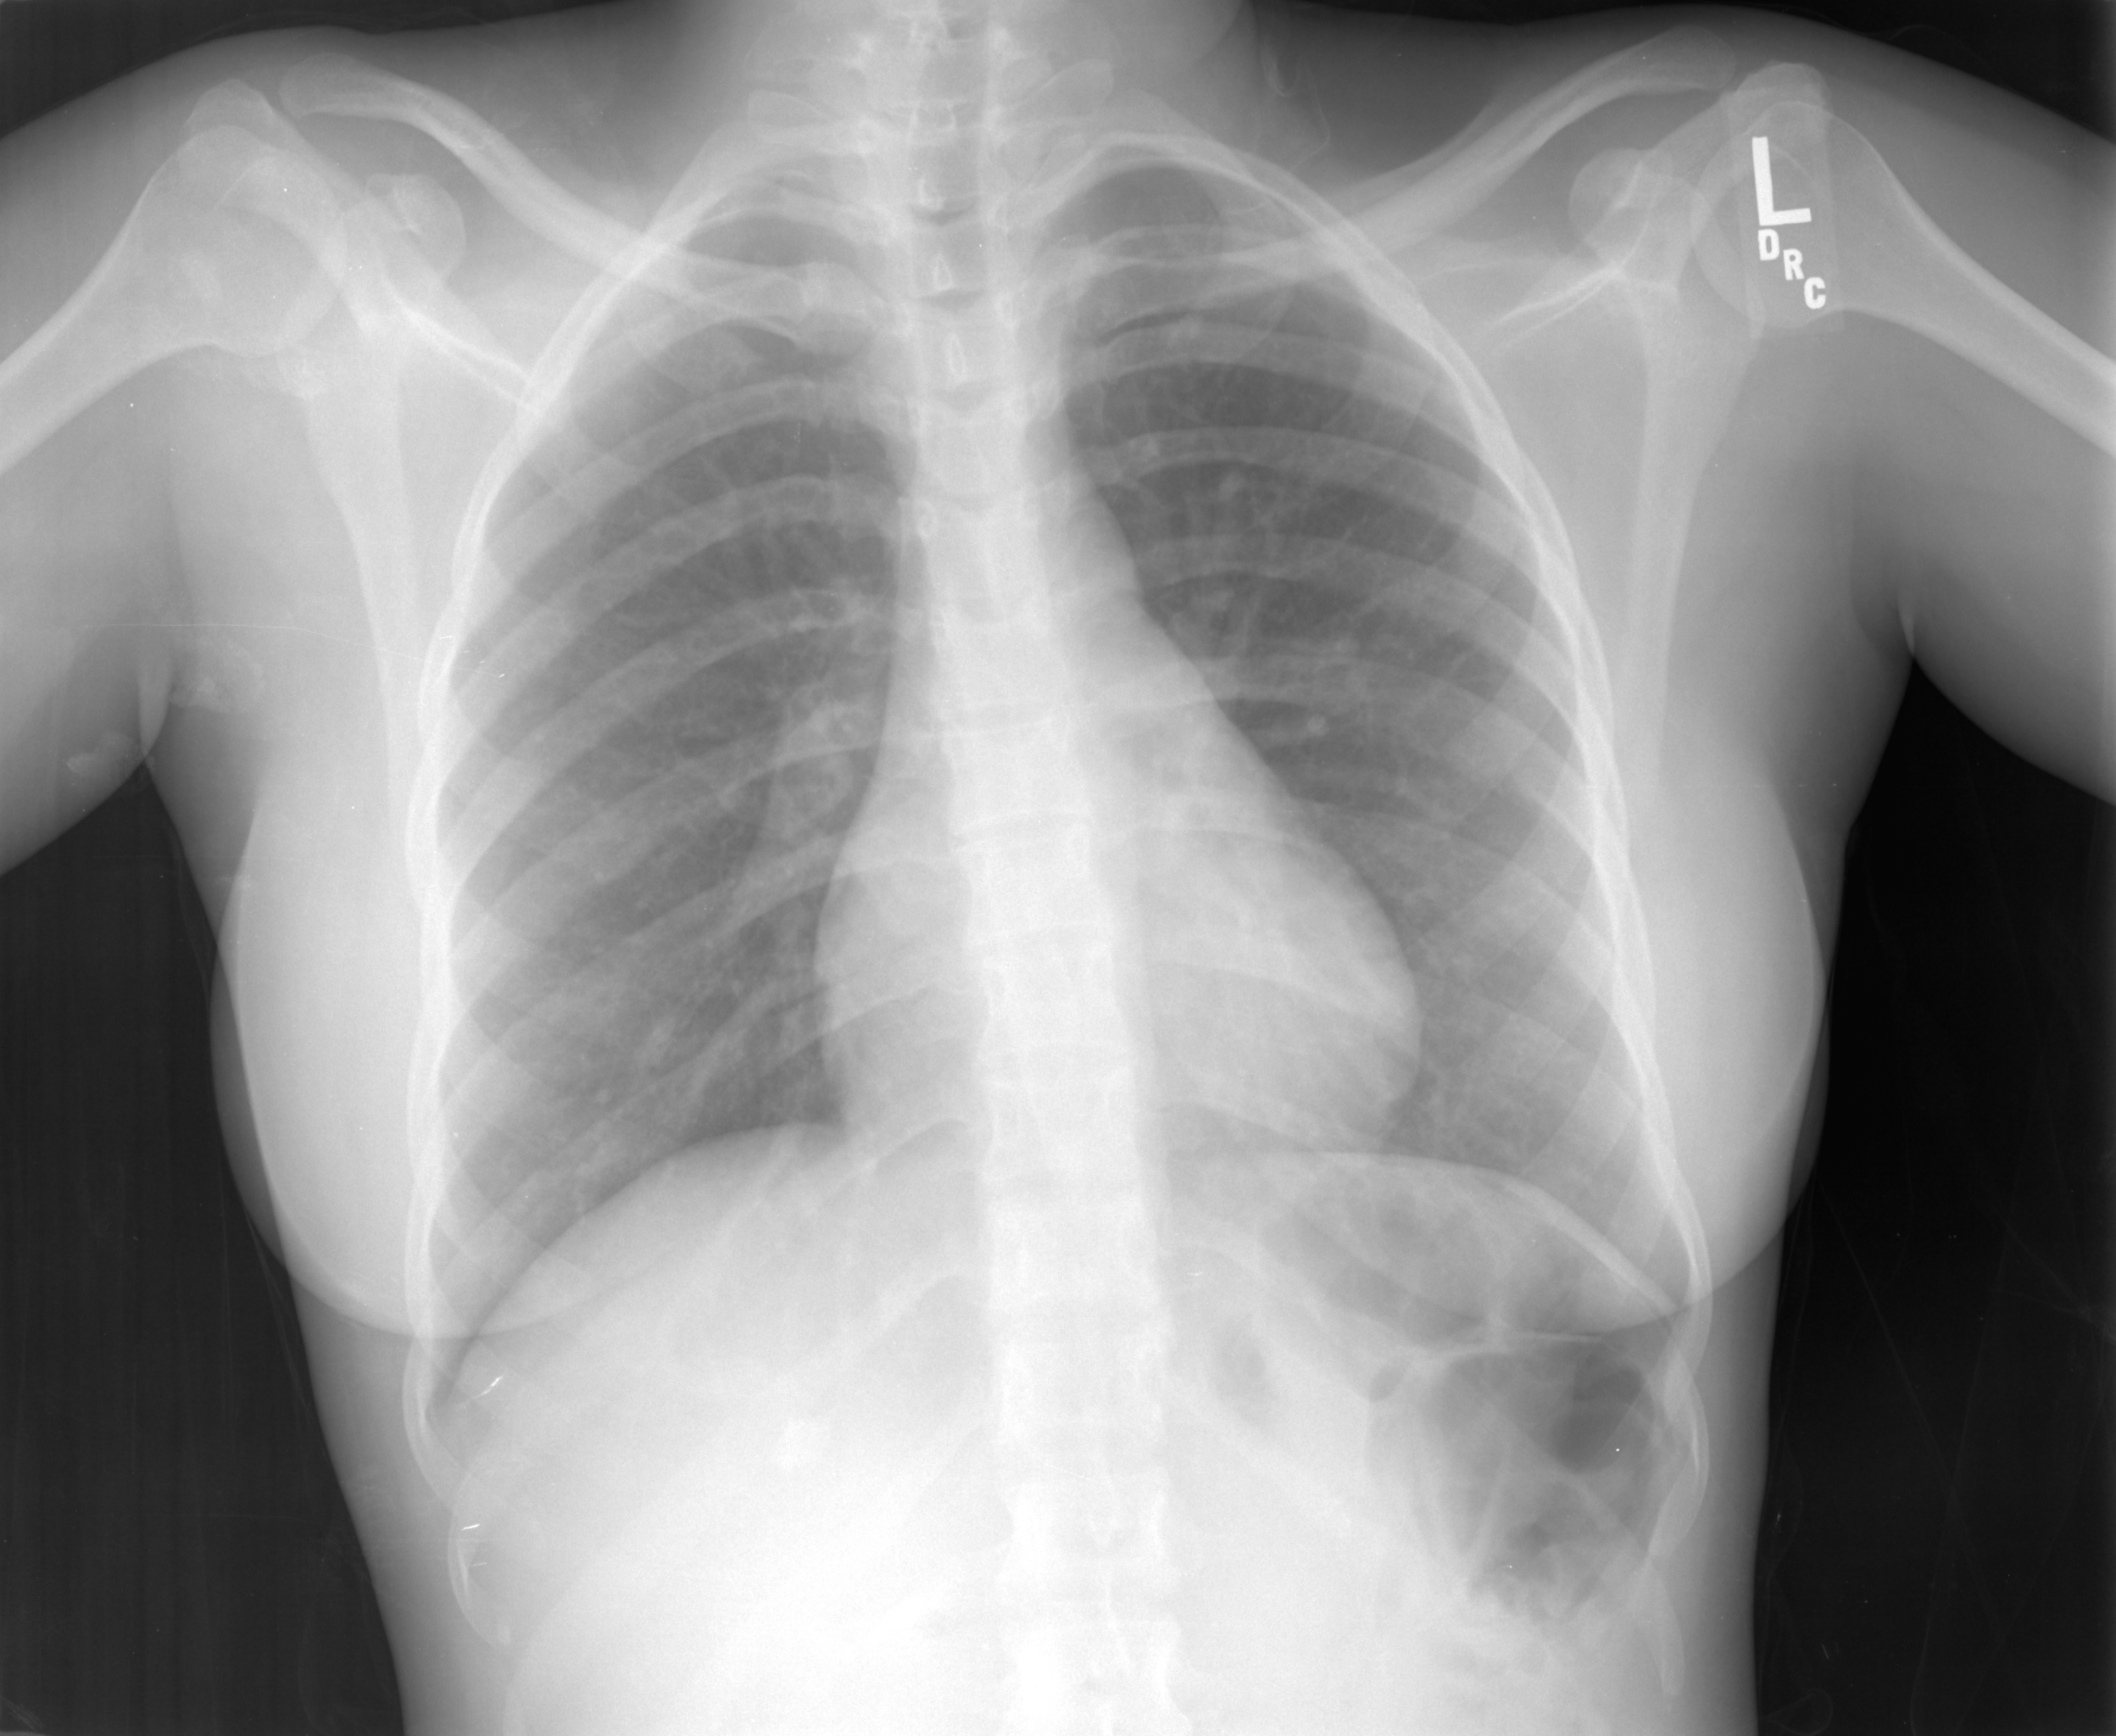

In [108]:
print(train_captions[0])
Image.open(image_paths[0])

<start> startseq Indications: Positive TB test endseq startseq Findings: The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. endseq startseq Impressions: Normal chest x-XXXX. endseq <end>


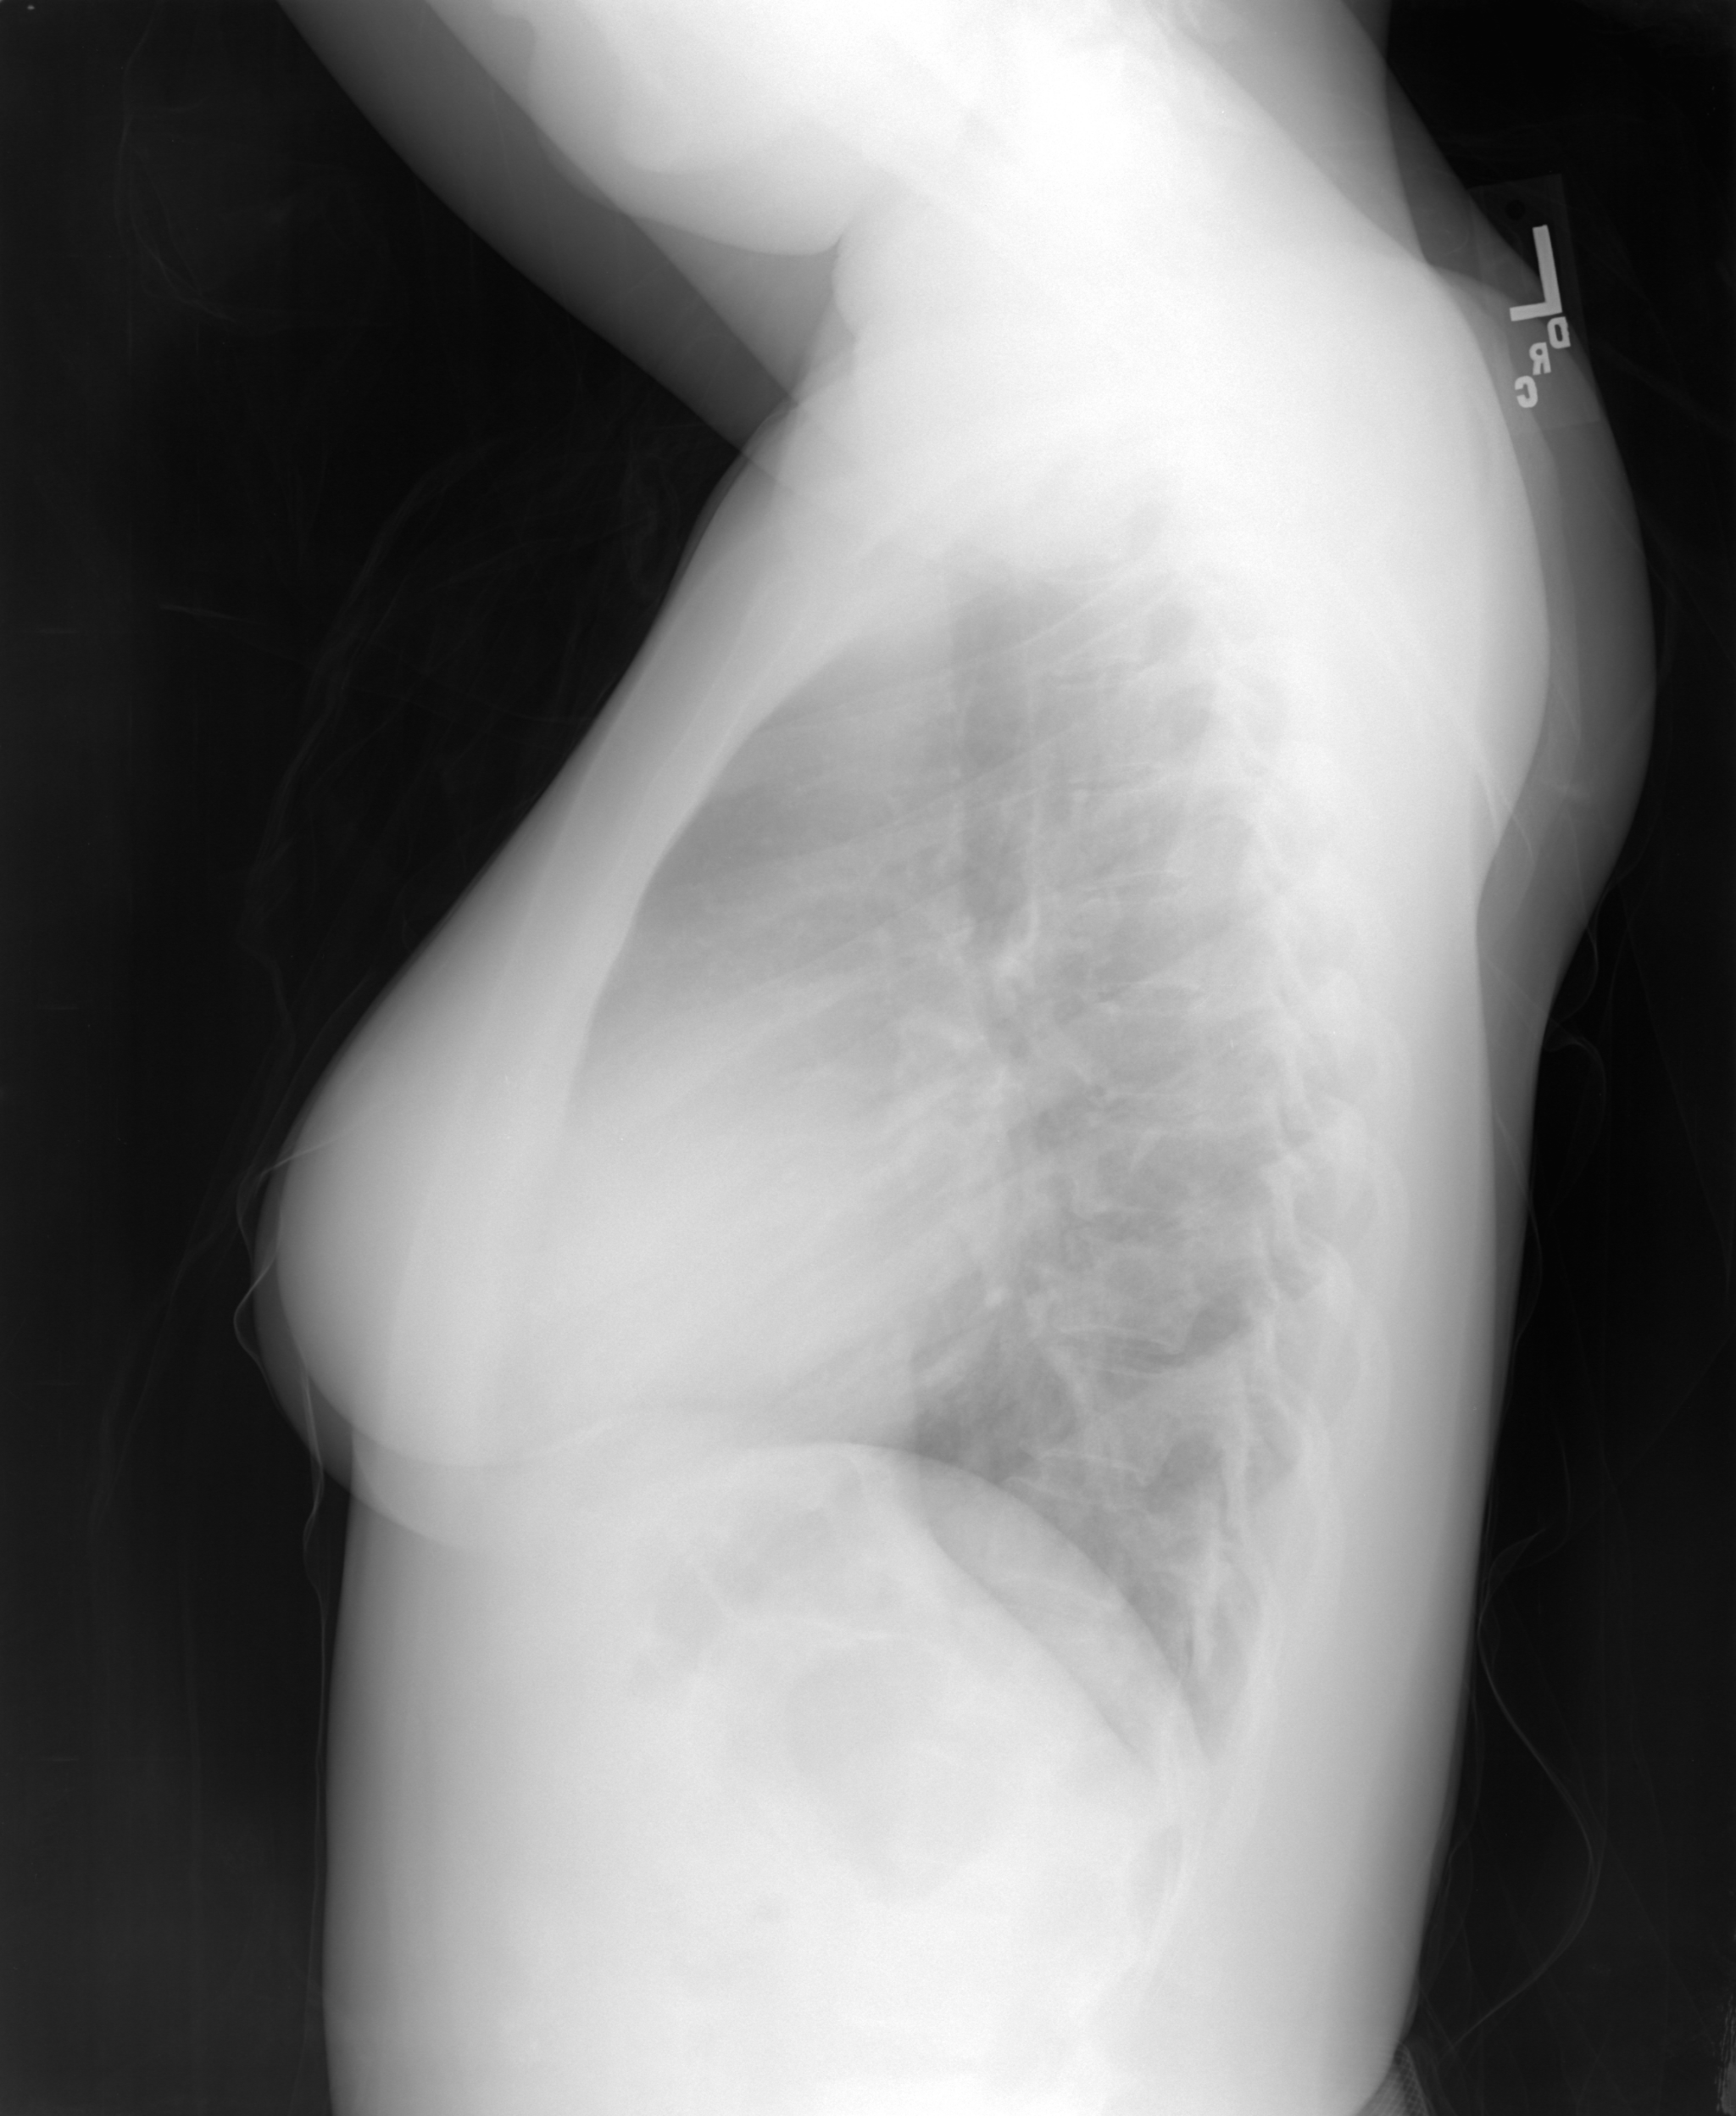

In [109]:
print(train_captions[1])
Image.open(image_paths[1])

### Preparing the Model

In [110]:
image_model = base_model

In [111]:
image_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

In [112]:
# image_model = EfficientNetB0(include_top = False)
# image_model.trainable = True 

In [113]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.keras.layers.Resizing(299, 299)(img)
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [114]:
## Make the Image feature Extractor Model
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [115]:
# ## Preprocessing and tokenizing the captions
# import tensorflow_hub as hub
# USE = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
#                                         trainable=False,
#                                         name="universal_sentence_encoder")

In [116]:
train_captions[:5], image_paths[:5]

(['<start> startseq Indications: Positive TB test endseq startseq Findings: The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. endseq startseq Impressions: Normal chest x-XXXX. endseq <end>',
  '<start> startseq Indications: Positive TB test endseq startseq Findings: The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. endseq startseq Impressions: Normal chest x-XXXX. endseq <end>',
  '<start> startseq Indications: Preop bariatric surgery. endseq startseq Findings: Borderline cardiomegaly. Midline sternotomy XXXX. Enlarged pulmonary arteries. Clear lungs. Inferior XXXX XXXX XXXX. endseq startseq Impressions: No acute pulmonary findings. endseq <end>',
  '<start> startseq In

In [117]:
!pip install tqdm

In [118]:
from tqdm import tqdm

In [119]:
# Get unique images
encode_train = sorted(set(image_paths))

image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(
  load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(16)

for img, path in tqdm(image_dataset):
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

100%|██████████| 467/467 [08:21<00:00,  1.07s/it]


In [120]:
caption_dataset = tf.data.Dataset.from_tensor_slices(train_captions)

# Max word count for a caption.
max_length = 100
# Use the top 5000 words for a vocabulary.
vocabulary_size = 12000
tokenizer = tf.keras.layers.TextVectorization(
    max_tokens=vocabulary_size,
    output_sequence_length=max_length)
# Learn the vocabulary from the caption data.
tokenizer.adapt(caption_dataset)

In [121]:
cap_vector = caption_dataset.map(lambda x: tokenizer(x))

In [122]:
for vector in cap_vector:
  print(vector)
  print(vector.shape)
  break

tf.Tensor(
[ 13   2  14 316 380 866   3   2   9   5  76  42  16  59  25   8  32  10
  35  23   7   4  30  82  23   7   4  27  40  23   8   4   6  11  50  18
  21  23   7   4  52  11  20   3   2  15  10  33 231   3  12   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0], shape=(100,), dtype=int64)
(100,)


In [123]:
## Create word to tokens and tokens to words mapping 
word_to_index = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary())
index_to_word = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary(),
    invert=True)

In [124]:
## Split data to training and testing 
img_to_cap_vector = collections.defaultdict(list)
for img, cap in zip(image_paths, cap_vector):
  img_to_cap_vector[img].append(cap)

# Create training and validation sets using an 80-20 split randomly.
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.8)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
  capt_len = len(img_to_cap_vector[imgt])
  img_name_train.extend([imgt] * capt_len)
  cap_train.extend(img_to_cap_vector[imgt])

img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
  capv_len = len(img_to_cap_vector[imgv])
  img_name_val.extend([imgv] * capv_len)
  cap_val.extend(img_to_cap_vector[imgv])

In [125]:
img_name_train[:5], index_to_word(cap_train[:5])

(['/content/images/images_normalized/2922_IM-1325-12012.dcm.png',
  '/content/images/images_normalized/2753_IM-1203-1002.dcm.png',
  '/content/images/images_normalized/3743_IM-1870-1001.dcm.png',
  '/content/images/images_normalized/1483_IM-0313-2001.dcm.png',
  '/content/images/images_normalized/371_IM-1852-1001.dcm.png'],
 <tf.Tensor: shape=(5, 100), dtype=string, numpy=
 array([[b'start', b'startseq', b'indications', b'xxxxyearold', b'male',
         b'pain', b'endseq', b'startseq', b'findings', b'hyperinflated',
         b'lungs', b'with', b'flattened', b'diaphragm', b'and',
         b'increased', b'retrosternal', b'airspace', b'no', b'alveolar',
         b'consolidation', b'no', b'findings', b'of', b'pleural',
         b'effusion', b'or', b'pulmonary', b'edema', b'heart', b'size',
         b'within', b'normal', b'limits', b'right', b'hilar',
         b'calcification', b'suggests', b'a', b'previous',
         b'granulomatous', b'process', b'endseq', b'startseq',
         b'impressi

In [126]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(5972, 5972, 1494, 1494)

In [127]:
checker = dataframe.loc[dataframe["filename"]=="7_IM-2263-2001.dcm.png"]

In [128]:
checker

uid                                               MeSH  \
13    7  Pulmonary Atelectasis/base;Spondylosis/thoraci...   

                                       Problems                      image  \
13  Pulmonary Atelectasis;Spondylosis;Arthritis  Xray Chest PA and Lateral   

              indication  comparison  \
13  Preop lumbar surgery  XXXX, XXXX   

                                             findings  \
13  The cardiac contours are normal. XXXX basilar ...   

                                           impression                filename  \
13  Basilar atelectasis. No confluent lobar consol...  7_IM-2263-2001.dcm.png   

   projection  
13    Lateral

In [129]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(5972, 5972, 1494, 1494)

### Creating tf.data datasets

In [130]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000
embedding_dim = 512
units = 1024
num_steps = len(img_name_train) // BATCH_SIZE
features_shape = 2560
attention_features_shape = 64

In [131]:
# Load the numpy files
def map_func(img_name, cap):
  img_tensor = np.load(img_name.decode('utf-8')+'.npy')
  return img_tensor, cap

In [132]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int64]),
          num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [133]:
dataset

<PrefetchDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.int64, name=None))>

## Creating the model

In [134]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim)

    # hidden shape == (batch_size, hidden_size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
    hidden_with_time_axis = tf.expand_dims(hidden, 1)

    # attention_hidden_layer shape == (batch_size, 64, units)
    attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                         self.W2(hidden_with_time_axis)))

    # score shape == (batch_size, 64, 1)
    # This gives you an unnormalized score for each image feature.
    score = self.V(attention_hidden_layer)

    # attention_weights shape == (batch_size, 64, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [135]:
class CNN_Encoder(tf.keras.Model):
    # Since you have already extracted the features and dumped it
    # This encoder passes those features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

In [136]:
class RNN_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(RNN_Decoder, self).__init__()
    self.units = units

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc1 = tf.keras.layers.Dense(self.units)
    self.fc2 = tf.keras.layers.Dense(vocab_size)

    self.attention = BahdanauAttention(self.units)

  def call(self, x, features, hidden):
    # defining attention as a separate model
    context_vector, attention_weights = self.attention(features, hidden)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # shape == (batch_size, max_length, hidden_size)
    x = self.fc1(output)

    # x shape == (batch_size * max_length, hidden_size)
    x = tf.reshape(x, (-1, x.shape[2]))

    # output shape == (batch_size * max_length, vocab)
    x = self.fc2(x)

    return x, state, attention_weights

  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

In [137]:
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, tokenizer.vocabulary_size())

In [138]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')


def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [139]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer=optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [140]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
  # restoring the latest checkpoint in checkpoint_path
  ckpt.restore(ckpt_manager.latest_checkpoint)

## Training

In [141]:
loss_plot = []

In [142]:
@tf.function
def train_step(img_tensor, target):
  loss = 0

  # initializing the hidden state for each batch
  # because the captions are not related from image to image
  hidden = decoder.reset_state(batch_size=target.shape[0])

  dec_input = tf.expand_dims([word_to_index('<start>')] * target.shape[0], 1)

  with tf.GradientTape() as tape:
      features = encoder(img_tensor)

      for i in range(1, target.shape[1]):
          # passing the features through the decoder
          predictions, hidden, _ = decoder(dec_input, features, hidden)

          loss += loss_function(target[:, i], predictions)

          # using teacher forcing
          dec_input = tf.expand_dims(target[:, i], 1)

  total_loss = (loss / int(target.shape[1]))

  trainable_variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, trainable_variables)

  optimizer.apply_gradients(zip(gradients, trainable_variables))

  return loss, total_loss

In [143]:
EPOCHS = 20

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            average_batch_loss = batch_loss.numpy()/int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
      ckpt_manager.save()

    print(f'Epoch {epoch+1} Loss {total_loss/num_steps:.6f}')
    print(f'Time taken for 1 epoch {time.time()-start:.2f} sec\n')

Epoch 1 Batch 0 Loss 4.3761
Epoch 1 Loss 2.082829
Time taken for 1 epoch 253.24 sec

Epoch 2 Batch 0 Loss 1.5852
Epoch 2 Loss 1.442031
Time taken for 1 epoch 58.01 sec

Epoch 3 Batch 0 Loss 1.4515
Epoch 3 Loss 1.355416
Time taken for 1 epoch 57.60 sec

Epoch 4 Batch 0 Loss 1.3067
Epoch 4 Loss 1.276120
Time taken for 1 epoch 57.63 sec

Epoch 5 Batch 0 Loss 1.2838
Epoch 5 Loss 1.203299
Time taken for 1 epoch 57.71 sec

Epoch 6 Batch 0 Loss 1.3054
Epoch 6 Loss 1.157490
Time taken for 1 epoch 58.18 sec

Epoch 7 Batch 0 Loss 1.0005
Epoch 7 Loss 1.123411
Time taken for 1 epoch 57.64 sec

Epoch 8 Batch 0 Loss 1.1640
Epoch 8 Loss 1.088978
Time taken for 1 epoch 57.64 sec

Epoch 9 Batch 0 Loss 1.0730
Epoch 9 Loss 1.064228
Time taken for 1 epoch 57.80 sec

Epoch 10 Batch 0 Loss 0.9850
Epoch 10 Loss 1.040806
Time taken for 1 epoch 57.71 sec

Epoch 11 Batch 0 Loss 1.1703
Epoch 11 Loss 1.019805
Time taken for 1 epoch 58.11 sec

Epoch 12 Batch 0 Loss 0.9735
Epoch 12 Loss 1.004067
Time taken for 1 ep

In [144]:
EPOCHS = 20

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            average_batch_loss = batch_loss.numpy()/int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
      ckpt_manager.save()

    print(f'Epoch {epoch+1} Loss {total_loss/num_steps:.6f}')
    print(f'Time taken for 1 epoch {time.time()-start:.2f} sec\n')

Epoch 1 Batch 0 Loss 0.9089
Epoch 1 Loss 0.904628
Time taken for 1 epoch 58.96 sec

Epoch 2 Batch 0 Loss 0.8327
Epoch 2 Loss 0.898650
Time taken for 1 epoch 57.91 sec

Epoch 3 Batch 0 Loss 0.8877
Epoch 3 Loss 0.884800
Time taken for 1 epoch 57.57 sec

Epoch 4 Batch 0 Loss 0.8690
Epoch 4 Loss 0.874395
Time taken for 1 epoch 57.61 sec

Epoch 5 Batch 0 Loss 0.9075
Epoch 5 Loss 0.866910
Time taken for 1 epoch 57.63 sec

Epoch 6 Batch 0 Loss 0.8824
Epoch 6 Loss 0.860537
Time taken for 1 epoch 58.06 sec

Epoch 7 Batch 0 Loss 0.7383
Epoch 7 Loss 0.859881
Time taken for 1 epoch 57.59 sec

Epoch 8 Batch 0 Loss 0.6917
Epoch 8 Loss 0.849653
Time taken for 1 epoch 57.60 sec

Epoch 9 Batch 0 Loss 0.8691
Epoch 9 Loss 0.839623
Time taken for 1 epoch 57.62 sec

Epoch 10 Batch 0 Loss 0.8106
Epoch 10 Loss 0.831101
Time taken for 1 epoch 57.54 sec

Epoch 11 Batch 0 Loss 0.6836
Epoch 11 Loss 0.824191
Time taken for 1 epoch 58.06 sec

Epoch 12 Batch 0 Loss 0.8985
Epoch 12 Loss 0.822309
Time taken for 1 epo

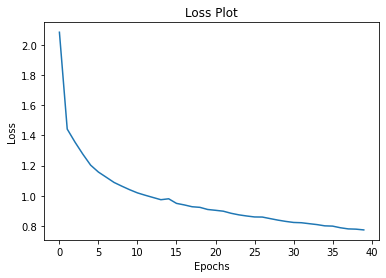

In [145]:
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

### Caption

In [146]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0],
                                                 -1,
                                                 img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([word_to_index('<start>')], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input,
                                                         features,
                                                         hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        predicted_word = tf.compat.as_text(index_to_word(predicted_id).numpy())
        result.append(predicted_word)
        
        if predicted_word == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [147]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for i in range(len_result):
        temp_att = np.resize(attention_plot[i], (8, 8))
        grid_size = max(int(np.ceil(len_result/2)), 2)
        ax = fig.add_subplot(grid_size, grid_size, i+1)
        ax.set_title(result[i])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

Real Caption: start startseq indications chest pain endseq startseq findings lung lines remain low however no focal infiltrates are identified heart and pulmonary xxxx are normal endseq startseq impressions xxxx change hypoinflation with no visible active cardiopulmonary disease endseq end
Prediction Caption: startseq indications left arm numbness endseq startseq findings the heart is normal in size the mediastinum is unremarkable the lungs are clear without evidence of acute infiltrate or effusion identified left pleural effusion xxxx is seen within the left midlung no pneumothorax or large pleural effusion endseq startseq impressions 1 hyperinflated lungs mediastinal contours appear normal slight bilateral pleural effusions left ij venous catheter seen xxxx corresponding to prior granulomatous disease mild bilateral pleural effusions versus atelectasis in the tracheostomy tube tip 64 cm no acute abnormality endseq end endseq end endseq startseq impressions no acute cardiopulmonary ab

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  from ipykernel import kernelapp as app


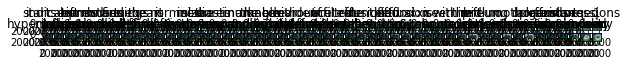

In [149]:
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tf.compat.as_text(index_to_word(i).numpy())
                         for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)

print('Real Caption:', real_caption)
print('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)

Real Caption: start startseq indications dyspnea endseq startseq findings the heart is top normal in size the mediastinum is stable the aorta is atherosclerotic xxxx opacities are noted in the lung bases compatible with scarring or atelectasis there is no acute infiltrate or pleural effusion endseq startseq impressions chronic changes without acute disease endseq end
Prediction Caption: startseq indications shortness of breath hypertension endseq startseq findings nan endseq startseq impressions ltthe heart size within normal limits no focal consolidation pneumothorax or large pleural effusion visualized bony structures are otherwise unremarkable in appearance of focal airspace disease no pleural effusion or pneumothorax the bony elements from elsewhere are no displaced rib fractures endseq startseq impressions chest three total images to be grossly unremarkable no suspicious pulmonary opacities mild degenerative changes of right apex otherwise unremarkable exam endseq end endseq start

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


Real Caption: start startseq indications xxxxyearold xxxx with chest pain endseq startseq findings the lungs are clear bilaterally specifically no evidence of focal consolidation pneumothorax or pleural effusion cardio mediastinal silhouette is unremarkable visualized osseous structures of the thorax are without acute abnormality endseq startseq impressions no acute cardiopulmonary abnormality endseq end
Prediction Caption: startseq indications xxxx year old with xxxx with dyspnea endseq startseq findings lung volumes are low no effusions or soft tissue again seen the most caudal xxxx opacities large pleural effusion no bony structures are unremarkable in size atherosclerotic calcifications are present in the thoracolumbar spine with stable mild pulmonary vascular congestion for further details endseq end endseq end endseq end endseq startseq impressions nan endseq end of left knee severe endseq startseq findings cardiac enlargement of the visualized is basilar opacity in the left lung

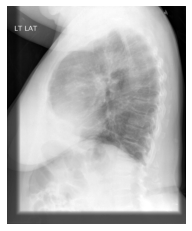

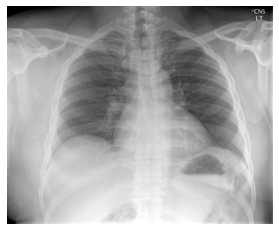

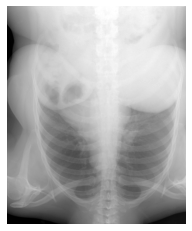

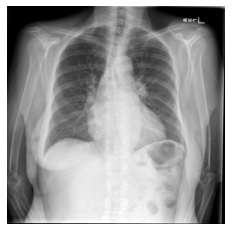

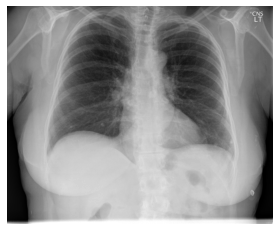

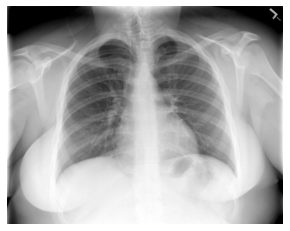

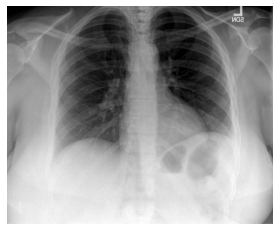

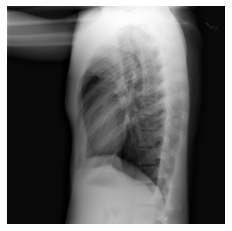

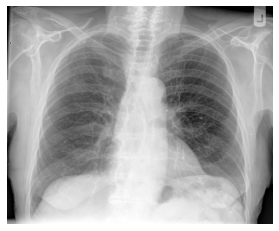

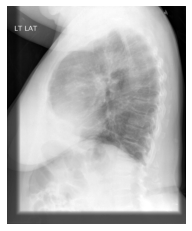

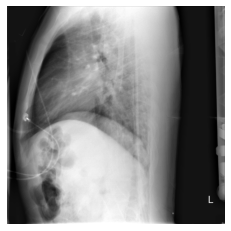

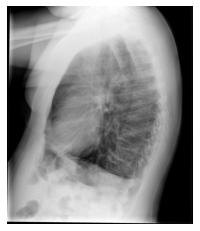

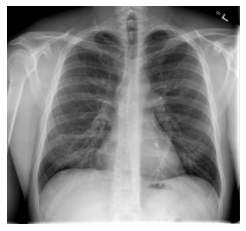

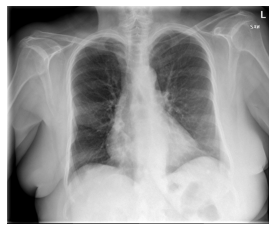

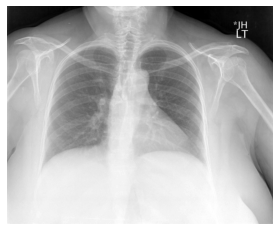

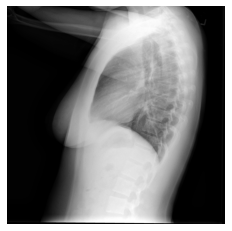

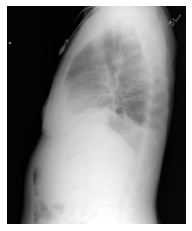

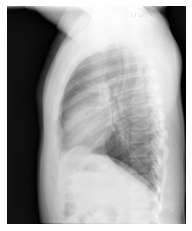

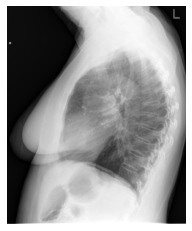

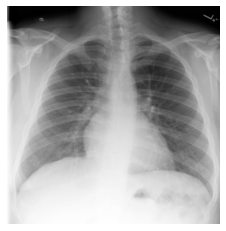

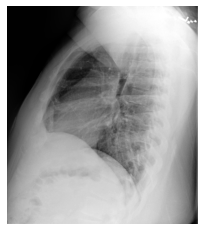

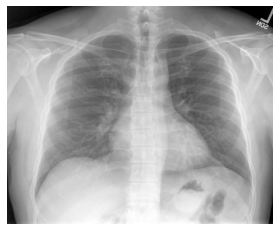

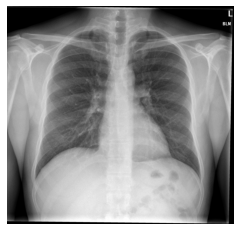

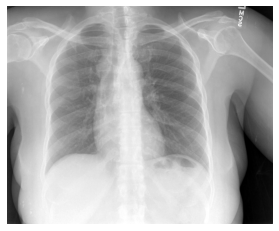

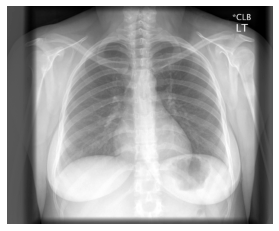

In [148]:
real_captions = []
predicted_captions = []
for i in range(25):
  # captions on the validation se
  rid = np.random.randint(0, len(img_name_val))
  image = img_name_val[rid]
  real_caption = ' '.join([tf.compat.as_text(index_to_word(i).numpy())
                         for i in cap_val[rid] if i not in [0]])
  result, attention_plot = evaluate(image)
  pred_cap = ' '.join(result)
  print('Real Caption:', real_caption)
  real_captions.append(real_caption)
  print('Prediction Caption:', ' '.join(result))
  predicted_captions.append(pred_cap)
  img = plt.imread(image)
  plt.figure()
  plt.imshow(img, cmap = "gray")
  plt.axis(False)

In [ ]:
!pip install aspose-words

     |████████████████████████████████| 64.4 MB 580 kB/s 


In [ ]:
import aspose.words as aw

Exception ignored in: 'FieldInitializationWarning'
ImportError: the static field 'transparent' of type 'aspose.pydrawing.Brushes' is not initialized
Exception ignored in: 'FieldInitializationWarning'
ImportError: the static field 'alice_blue' of type 'aspose.pydrawing.Brushes' is not initialized
Exception ignored in: 'FieldInitializationWarning'
ImportError: the static field 'antique_white' of type 'aspose.pydrawing.Brushes' is not initialized


In [ ]:
doc = aw.Document()
builder = aw.DocumentBuilder(doc)

In [ ]:
real_captions[:2], predicted_captions[:2]

(['startseq xxxx the heart is normal in size the pulmonary vascularity is within normal limits in appearance no focal air space opacities no pleural effusions or pneumothorax no acute bony abnormalities no acute cardiopulmonary abnormalities endseq',
  'startseq routine exam cardiac and mediastinal contours are within normal limits the lungs are clear bony structures are intact negative chest xxxxx endseq'],
 ['shortness of breath chest chest xxxx focal consolidation large pleural effusion redemonstration of left atrial appendage as compared to xxxx is unremarkable the lungs are clear no acute pulmonary process endseq some vague nodular density in the lateral right hemidiaphragm noted heart size remains slightly large pulmonary edema distal tip in the t9 vertebral body ageindeterminate wedge xxxx appears stable stable mediastinal contours normal mediastinal contour pulmonary xxxx and pulmonary xxxx appear be at upper limits of normal tortuous right hemidiaphragm eventration no visible 

In [ ]:
for i in range(25):
  builder.write("Real Caption")
  buil